/var/folders/fb/xb26b7pj5_933srbq0z1j63w0000gp/T/ipykernel_84404/61657512.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_table is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_table(filename,
/var/folders/fb/xb26b7pj5_933srbq0z1j63w0000gp/T/ipykernel_84404/61657512.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_table is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_table(filename,


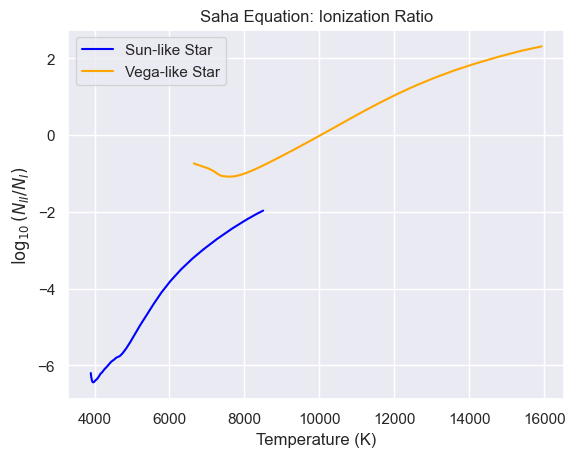

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_theme()

def read_atmosphere_data(filename):
    df = pd.read_table(filename,
                         header = 0,
                         names = np.arange(0, 50, 1),
                         delim_whitespace = True).transpose()

    df.columns = ['theta', 'log10_pe']

    with open(filename, 'r') as file:
        lines = file.readlines()[1:]
        theta = np.array([float(x) for x in lines[0].split()])
        log10_pe = np.array([float(x) for x in lines[1].split()])

    return theta, log10_pe

    # return list(zip(theta, log10_pe))
    # return df['theta'], df['log10_pe']

saha_params_constants = {
    # constants for this problem
    'Z_II': 1, # atomic number of neutral hydrogen
    'Z_I': 2, # atomic number of ionized hydrogen
    'chi_ion': 13.595, # Ionization energy of hydrogen in eV

    # # variables for this problem
    # 'log10_pe': 0, # log10 of electron pressure
    # 'theta': 0, # inverse temperature
    # 'T': 0 # temperature in K
}

# Saha equation calculation
def saha_equation(params):
    return np.log10(params['Z_II'] / params['Z_I']) \
        + 5/2*np.log10(params['T']) \
        - params['chi_ion'] * params['theta'] - params['log10_pe'] \
        + np.log10(2) - 0.4772

    # T = params['T']
    # return (np.log10(1/2) + np.log10(2) + (5/2)*np.log10(T) 
    #         - chi_ion*theta - log10_p - 0.4772)

# Plotting function
def plot_saha_results(T, log10_NII_NI, star_name, label, color):
    plt.plot(T, log10_NII_NI, label=label, color=color)
    plt.xlabel('Temperature (K)')
    plt.ylabel('$\log_{10}(N_{II}/N_I)$')
    plt.title('Saha Equation: Ionization Ratio')
    plt.legend()
    plt.grid(True)
    plt.show()

sun_file = 'data/hw2/sun-atmosphere-kamp.txt'
vega_file = 'data/hw2/vega-atmosphere-kamp.txt'

# Read data
sun_theta, sun_log10_pe = read_atmosphere_data(sun_file)
vega_theta, vega_log10_pe = read_atmosphere_data(vega_file)

# Calculate for Sun-like star
sun_T = 5040 / sun_theta
sun_log10_NII_NI = saha_equation({
    **saha_params_constants,
    'theta': sun_theta,
    'log10_pe': sun_log10_pe,
    'T': sun_T
})

# Calculate for Vega-like star
vega_T = 5040 / vega_theta
vega_log10_NII_NI = saha_equation({
    **saha_params_constants,
    'theta': vega_theta,
    'log10_pe': vega_log10_pe,
    'T': vega_T
})

# plot_saha_results(sun_T, sun_log10_NII_NI, 'Sun-like Star', 'Sun-like Star', 'blue')
# plot_saha_results(vega_T, vega_log10_NII_NI, 'Vega-like Star', 'Vega-like Star', 'orange')
plt.plot(sun_T, sun_log10_NII_NI, label="Sun-like Star", color='blue')
plt.plot(vega_T, vega_log10_NII_NI, label="Vega-like Star", color='orange')
plt.xlabel('Temperature (K)')
plt.ylabel('$\log_{10}(N_{II}/N_I)$')
plt.title('Saha Equation: Ionization Ratio')
plt.legend()
plt.grid(True)
plt.show()


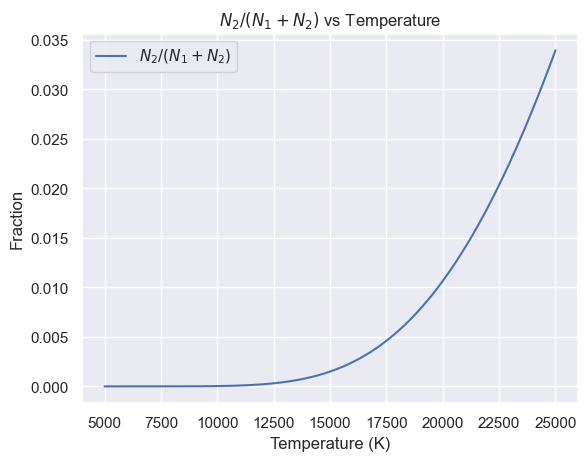

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
k_B = 8.617333262145e-5  # Boltzmann constant in eV/K
h = 6.62607015e-27       # Planck's constant in erg*s
m_e = 9.10938356e-28     # Electron mass in g
chi_ion = 13.595         # Ionization energy of hydrogen in eV
E2_E1 = 10.2             # Energy difference between n=2 and n=1 in eV
g2 = 8                   # Degeneracy of n=2
g1 = 2                   # Degeneracy of n=1
Pe_cgs = 2e8             # Electron pressure in erg/cm^3

# Temperature range (5000K to 25000K in 1K increments)
Teff = np.arange(5000, 25001, 1)

# Calculate Ne from Pe and T
def calculate_ne(Teff):
    return Pe_cgs / (k_B * Teff)

# Boltzmann equation: N2 / N1
def boltzmann_equation(Teff):
    boltzmann_exp = np.exp(-E2_E1 / (k_B * Teff))
    N2_N1 = (g2 / g1) * boltzmann_exp
    return N2_N1

# Calculate N2 / (N1 + N2), NII / Ntotal, and N2 / Ntotal

f1_y = boltzmann_equation(Teff) / (boltzmann_equation(Teff) + 1)

# sns.lineplot(x=Teff, y=f1_y, label='$N_2 / (N_1 + N_2)$', color='blue')

plt.figure()
plt.plot(Teff, f1_y, label='$N_2 / (N_1 + N_2)$')
plt.xlabel('Temperature (K)')
plt.ylabel('Fraction')
plt.title('$N_2 / (N_1 + N_2)$ vs Temperature')
plt.grid(True)
plt.legend()
plt.show()

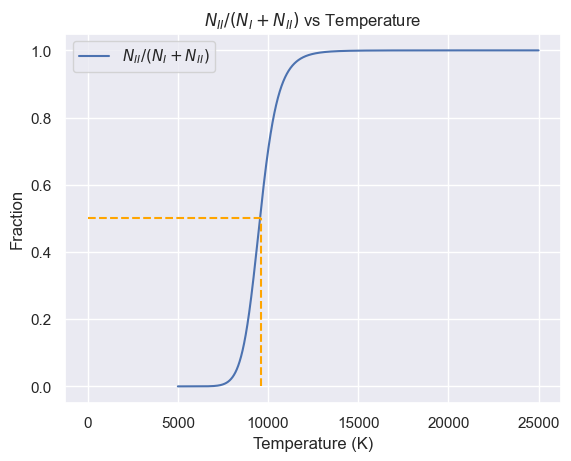

In [48]:
log10_NII_NI = saha_equation({
    **saha_params_constants,
    'theta': 5040 / Teff,
    'log10_pe': np.log10(200), # 20 N / m^2 = 200 ergs / cm^3
    'T': Teff,
})

NII_NI = 10 ** log10_NII_NI

f2_y = NII_NI / (NII_NI + 1)
plt.figure()
plt.plot(Teff, f2_y, label='$N_{II} / (N_I + N_{II})$')
plt.plot(
    np.repeat(9600, 100), 
    np.linspace(0, 0.5, 100), 
    color = "orange",
    linestyle = 'dashed')
plt.plot(
    np.linspace(0, 9600, 100), 
    np.repeat(0.5, 100), 
    color = "orange",
    linestyle = 'dashed')
plt.xlabel('Temperature (K)')
plt.ylabel('Fraction')
plt.title('$N_{II} / (N_{I} + N_{II})$ vs Temperature')
plt.grid(True)
plt.legend()
plt.show()

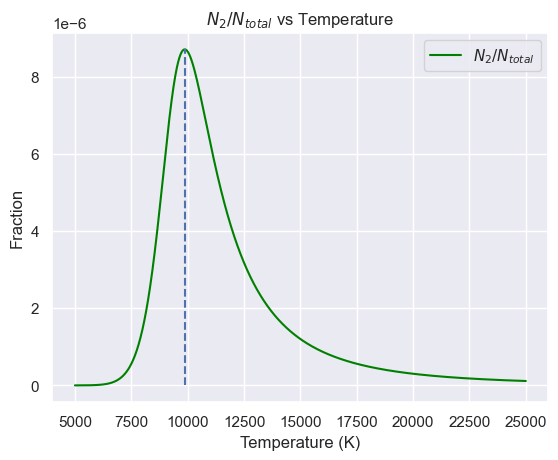

In [49]:
N2_N1 = boltzmann_equation(Teff)
N2_Ntotal = (N2_N1 / (1 + N2_N1)) * (1 / (1 + NII_NI))

plt.figure()
plt.plot(Teff, N2_Ntotal, label='$N_2 / N_{total}$', color='green')
plt.plot(
    np.repeat(9900, 100), 
    np.linspace(min(N2_Ntotal), max(N2_Ntotal), 100),
    linestyle = 'dashed')
plt.xlabel('Temperature (K)')
plt.ylabel('Fraction')
plt.title('$N_2 / N_{total}$ vs Temperature')
plt.grid(True)
plt.legend()
plt.show()